In [2]:
import gzip
from io import StringIO
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import re
import string
import json
import matplotlib.pyplot as plt

In [2]:
!ls

0819_UkraineCombinedTweetsDeduped.csv.gzip	LDA.ipynb
0819_UkraineCombinedTweetsDeduped.csv.gzip.zip


In [3]:
def gzip_file_to_documents_list(file_name, languages_filter=['en']):
    with gzip.open(file_name, 'rb') as f:
        decompressed_data = f.read()
    df_data = pd.read_csv(StringIO(str(decompressed_data,'utf-8')), index_col=0)
    documents = df_data[df_data['language'].isin(languages_filter)]['text'].tolist()
    return documents

In [170]:
print(gzip_file_to_documents_list("0819_UkraineCombinedTweetsDeduped.csv.gzip")[0])

Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu


In [4]:
def uctd_file_name_by_date(month, day):
    return '0'*int(month < 10) + str(month) + '0'*int(day < 10) + str(day) + "_UkraineCombinedTweetsDeduped.csv.gzip"

In [169]:
uctd_file_name_by_date(8, 21)

'0821_UkraineCombinedTweetsDeduped.csv.gzip'

In [5]:
def get_uctd_documents_between_dates(start: str, end: str,
                                     languages_filter=['en'], verbose: int = 0):
    # Dates in the 'YYYY-DD-MM' format
    date_start = datetime.strptime(start, '%Y-%m-%d')
    date_end = datetime.strptime(end, '%Y-%m-%d')
    delta_days = date_end - date_start
    all_documents = []
    for i_d in range(delta_days.days + 1):
        date_current = date_start + timedelta(days=i_d)
        uctd_file_name = uctd_file_name_by_date(date_current.month, date_current.day)
        all_documents += gzip_file_to_documents_list(uctd_file_name, languages_filter=languages_filter)
        if verbose == 1:
            print(f'--Documents for the day {date_current.date()} processed')
    return all_documents

In [211]:
all_documents = get_uctd_documents_between_dates('2023-08-19','2023-08-23',verbose=1)

--Documents for the day 2023-08-19 processed
--Documents for the day 2023-08-20 processed
--Documents for the day 2023-08-21 processed
--Documents for the day 2023-08-22 processed
--Documents for the day 2023-08-23 processed


In [192]:
len(all_documents)

109452

In [4]:
with gzip.open("0819_UkraineCombinedTweetsDeduped.csv.gzip", 'rb') as f:
    decompressed_data = f.read()

In [23]:
df_data = pd.read_csv(StringIO(str(decompressed_data,'utf-8')), index_col=0)

In [26]:
df_data.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'is_retweet', 'original_tweet_id',
       'original_tweet_userid', 'original_tweet_username',
       'in_reply_to_status_id', 'in_reply_to_user_id',
       'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id',
       'quoted_status_userid', 'quoted_status_username', 'extractedts'],
      dtype='object')

In [28]:
df_data.language.value_counts()

language
en     23179
und     5429
de      4226
uk      3205
fr      2210
it      1898
es      1684
ru      1490
ja       530
tr       397
pt       350
zh       288
in       243
pl       218
nl       218
el       180
hi       159
ar       152
fi       132
ro       110
no       102
sv       101
et        97
da        96
ca        91
vi        87
fa        84
th        79
ur        76
ht        74
tl        72
cs        69
iw        68
bn        60
ta        58
lv        57
eu        54
ko        50
sl        33
bg        32
gu        31
ka        30
te        29
lt        29
kn        27
sr        25
is        17
cy        17
ml        15
mr        11
am         6
hu         4
my         4
or         4
pa         3
ne         1
hy         1
sd         1
ps         1
Name: count, dtype: int64

In [24]:
df_data.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,173212647,JoeMokolobetsi,Yeshua Hamashiach is THE answer | Romans 10:9-...,Afrika Borwa,219,197,4789,2010-07-31 19:09:22.000000,1560416252937617411,2022-08-19 00:00:00,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 08:07:26.836769
1,335041409,XclusivasPuebla,Somos el periódico #ExclusivasPuebla| Investi...,"Puebla, México",1419,6402,70267,2011-07-14 02:02:24.000000,1560416256179707904,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 07:51:50.523048
2,1512400441103032323,ShelterAnimalUA,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,782,109,1198,2022-04-08 12:02:47.000000,1560416257752666113,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 05:12:06.194216
3,1356632630662430722,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,39,690,2021-02-02 15:57:12.000000,1560416257790382081,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:22:26.824532
4,20297125,ElMananaOnline,Las mejores noticias de los dos Laredos y el m...,Nuevo Laredo,2269,17978,56188,2009-02-07 06:32:49.000000,1560416257937051648,2022-08-19 00:00:01,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-08-19 11:52:29.448634


In [32]:
documents = df_data[df_data['language']=='en']['text'].tolist()

In [200]:
documents_uk = df_data[df_data['language']=='uk']['text'].tolist()

In [34]:
print(documents[0])

Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu


In [230]:
def remove_links_content(text):
    text = re.sub(r"http\S+", "", text)
    return text

def remove_emails(text):
    return re.sub('\S+@\S*\s?', '', text)  # noqa

def remove_punctuation(text):
    """https://stackoverflow.com/a/37221663"""
    table = str.maketrans({key: None for key in string.punctuation})
    return text.translate(table)

def remove_multiple_space(text):
    return re.sub("\s\s+", " ", text)

In [117]:
def remove_hashtags(text):
    return re.sub('(?<=[\s\n])#\S+\s+', '', text)

In [118]:
print(documents[0])
print(remove_hashtags(documents[0]))

Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu
Dear vaccine advocate

Do take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.

Regards
https://t.co/VTbfuqiDvu


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /home/oleksii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oleksii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/oleksii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [199]:
# Function to preprocess documents
def preprocess(document):
    # Tokenize
    document = remove_links_content(document)
    document = remove_emails(document)
    document = remove_hashtags(document)
    document = remove_punctuation(document)
    document = remove_multiple_space(document)
    
    words = word_tokenize(document.lower())
    # Remove stopwords and punctuations
    filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
    # Lemmatize
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

In [191]:
# Preprocess all documents
preprocessed_documents = [preprocess(doc) for doc in documents]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=4, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(preprocessed_documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [151]:
preprocessed_documents[0]

'dear vaccine advocate take covid19 mrna shot booster know data show offer zero protection actually accelerates death vaccinated regard pfizer astrazeneca moderna nwo agenda2030 cop27 biden obama trudeau jacinda life'

In [152]:
print(tfidf[0])

  (0, 4564)	0.1395520015279304
  (0, 7965)	0.1864384585535873
  (0, 5373)	0.2023195918028436
  (0, 1078)	0.10189946606777062
  (0, 1911)	0.23615180907876085
  (0, 5365)	0.24162828280408494
  (0, 5003)	0.19323976918651925
  (0, 5732)	0.19173714110038736
  (0, 6352)	0.21983632953589854
  (0, 8253)	0.24162828280408494
  (0, 2147)	0.16033088507097837
  (0, 346)	0.25766948014492647
  (0, 392)	0.18376448998660044
  (0, 6072)	0.19894606194897763
  (0, 8728)	0.20456393935532585
  (0, 5414)	0.18376448998660044
  (0, 2122)	0.17186289387227352
  (0, 4387)	0.1327655200004032
  (0, 1207)	0.25766948014492647
  (0, 7030)	0.1711660683730146
  (0, 5075)	0.2526937699992935
  (0, 1970)	0.1770274687812375
  (0, 438)	0.23615180907876085
  (0, 8255)	0.17186289387227352
  (0, 2146)	0.1872531712745243


In [19]:
from sklearn.decomposition import TruncatedSVD

In [201]:
model = TruncatedSVD(n_components=100, n_iter=5, random_state=47)
model.fit_transform(tfidf)
model_components = model.components_

In [155]:
model.explained_variance_ratio_[:10]

array([0.01098185, 0.00711174, 0.00545351, 0.0048956 , 0.0043829 ])

In [156]:
model_components[0]

array([5.39232363e-04, 2.33241475e-04, 2.25998857e-04, ...,
       1.59070021e-04, 2.07269724e-05, 2.33960833e-04])

In [202]:
# Extract the top words for each topic
n_top_words = 10
topics = []
for topic_idx, topic in enumerate(model_components):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    topics.append(top_features)

In [203]:
topics

[['ukraine',
  'russia',
  'russian',
  'war',
  'ukrainian',
  'putin',
  'day',
  'state',
  'amp',
  'people'],
 ['russia',
  'russian',
  'putin',
  'ukrainian',
  'state',
  'pariah',
  'barbarism',
  'limit',
  'defeated',
  'crimeabelongstoukraine'],
 ['awesome',
  'passive',
  'hire',
  'website',
  'income',
  'create',
  'term',
  'autopilot',
  'long',
  'developer'],
 ['russia',
  'war',
  'putin',
  'news',
  'stop',
  'ukraine',
  'latest',
  'state',
  'breaking',
  'peace'],
 ['putin',
  'daughter',
  'war',
  'car',
  'killed',
  'amp',
  'dugin',
  'bomb',
  'alexander',
  'moscow'],
 ['day',
  'flag',
  'putin',
  'happy',
  'amp',
  'independence',
  'national',
  'daughter',
  'russia',
  'car'],
 ['ukraine',
  'putin',
  'daughter',
  'car',
  'killed',
  'fuck',
  'dugin',
  'bomb',
  'moscow',
  'alexander'],
 ['war',
  'russian',
  'day',
  'putin',
  'stop',
  'flag',
  'ukrainian',
  'happy',
  'support',
  'independence'],
 ['standwithukraine',
  'playing',


In [8]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import matutils

In [159]:
# Convert the list of top words into a list of lists of words
texts = [[word for word in doc.lower().split() if word in tfidf_feature_names] for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary = Dictionary(texts)

# Convert the dictionary and the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6986271061959081


In [148]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import matutils

# Convert the list of top words into a list of lists of words
texts = [[word for word in doc.lower().split() if word in tfidf_feature_names] for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary = Dictionary(texts)

# Convert the dictionary and the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.7877023306141202


## All documents between 19.08 and 23.08

In [197]:
# Preprocess all documents
preprocessed_all_documents = [preprocess(doc) for doc in all_documents]

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=4, stop_words='english') # 0.95
tfidf = tfidf_vectorizer.fit_transform(preprocessed_all_documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

model = TruncatedSVD(n_components=10, n_iter=5, random_state=47)
model.fit_transform(tfidf)
model_components = model.components_

# Extract the top words for each topic
n_top_words = 10
topics = []
for topic_idx, topic in enumerate(model_components):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tfidf_feature_names[i] for i in top_features_ind]
    topics.append(top_features)

topics

[['ukraine',
  'russia',
  'russian',
  'war',
  'ukrainian',
  'putin',
  'day',
  'state',
  'amp',
  'people'],
 ['russia',
  'russian',
  'putin',
  'ukrainian',
  'state',
  'pariah',
  'barbarism',
  'limit',
  'defeated',
  'crimeabelongstoukraine'],
 ['awesome',
  'passive',
  'hire',
  'website',
  'income',
  'create',
  'term',
  'autopilot',
  'long',
  'developer'],
 ['russia',
  'war',
  'putin',
  'news',
  'stop',
  'ukraine',
  'latest',
  'state',
  'breaking',
  'support'],
 ['putin',
  'daughter',
  'war',
  'car',
  'amp',
  'killed',
  'dugin',
  'bomb',
  'alexander',
  'moscow'],
 ['day',
  'putin',
  'flag',
  'happy',
  'daughter',
  'independence',
  'car',
  'national',
  'killed',
  'fuck'],
 ['ukraine',
  'russian',
  'putin',
  'daughter',
  'car',
  'killed',
  'dugin',
  'bomb',
  'alexander',
  'moscow'],
 ['war',
  'russian',
  'day',
  'putin',
  'stop',
  'flag',
  'happy',
  'ukrainian',
  'support',
  'today'],
 ['standwithukraine',
  'playing',
 

In [198]:
# Convert the list of top words into a list of lists of words
texts = [[word for word in doc.lower().split() if word in tfidf_feature_names] for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary = Dictionary(texts)

# Convert the dictionary and the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.4904281454464573


# General processing pipeline

## English

In [235]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
        # Lemmatize
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        if return_string:
            return ' '.join(lemmatized_words)
        else:
            return lemmatized_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        return re.sub('(?<=[\s\n])#\S+\s+', '', text)

In [82]:
class LSAPipelineEnglish:
    def __init__(self, documents_list, tf_idf_max_df=1.0, tf_idf_min_df=1,
                 lsa_components: int = 100, svd_n_iter: int = 5,
                 n_top_words: int = 10, ngram_range: tuple = (1, 1),
                 import_preprocessed_documents: bool = False, random_state: int = -1):
        self.import_documents_list = EnglishPreprocessor().preprocess_documents(documents_list)
        if not import_preprocessed_documents:
            self.import_documents_list = EnglishPreprocessor().preprocess_documents(documents_list,)
        else:
            self.import_documents_list = documents_list
        self.tf_idf_max_df = tf_idf_max_df
        self.tf_idf_min_df = tf_idf_min_df
        self.lsa_components = lsa_components
        self.svd_n_iter = svd_n_iter
        self.n_top_words = n_top_words
        self.ngram_range = ngram_range
        self.random_state = random_state
        self.coherence_texts_calculated = False

    def run_topics_detection(self):
        tfidf_documents = self.TF_IDF()
        self.TruncatedSVD(tfidf_documents)
        self.topics = self.find_topics()
        return self.topics

    def transform_documents(self, new_documents_list: list):
        return list(map(np.argmax, self.svd_model.transform(
            self.tfidf_vectorizer.transform(new_documents_list))))

    def import_ready_documents(self, documents_list, texts, dictionary, corpus):
        self.import_documents_list = documents_list
        self.texts = texts
        self.dictionary = dictionary
        self.corpus = corpus
        self.coherence_texts_calculated = True

    def TF_IDF(self):
        self.tfidf_vectorizer = TfidfVectorizer(max_df=self.tf_idf_max_df,
                                                min_df=self.tf_idf_min_df,
                                                ngram_range=self.ngram_range,
                                                stop_words='english')
        return self.tfidf_vectorizer.fit_transform(self.import_documents_list)
        # tfidf_feature_names = self.tfidf_vectorizer.get_feature_names_out()
    
    def TruncatedSVD(self, tfidf_documents):
        if self.random_state != -1:
            self.svd_model = TruncatedSVD(n_components=self.lsa_components,
                                 n_iter=self.svd_n_iter, random_state=self.random_state)
        else:
            self.svd_model = TruncatedSVD(n_components=self.lsa_components,
                                 n_iter=self.svd_n_iter)
        self.svd_model.fit_transform(tfidf_documents)

    def find_topics(self):
        # Extract the top words for each topic
        topics = []
        tfidf_feature_names = self.tfidf_vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(self.svd_model.components_):
            top_features_ind = topic.argsort()[:-self.n_top_words - 1:-1]
            top_features = [tfidf_feature_names[i] for i in top_features_ind]
            topics.append(top_features)
        return topics

    def calculate_coherence_score(self, recalculate_texts: bool = False, verbose: int = 0):
        if not self.coherence_texts_calculated or recalculate_texts:
            self.calculate_coherence_texts(verbose=verbose)
        # Calculate the coherence score using Gensim
        coherence_model = CoherenceModel(topics=self.topics,
                                         texts=self.texts,
                                         dictionary=self.dictionary,
                                         coherence='c_v')
        if verbose == 1:
            print(f'--Calculating the coherence score')
        self.coherence_score = coherence_model.get_coherence()
        return self.coherence_score

    def calculate_coherence_texts(self, verbose: int = 0):
        # Convert the list of top words into a list of lists of words
        tfidf_feature_names = set(self.tfidf_vectorizer.get_feature_names_out())
        if verbose == 1:
            print(f'--Starting forming the texts')
        self.texts = [[word for word in doc.lower().split() if (
            word in tfidf_feature_names)] for doc in self.import_documents_list]
        # Create a Gensim dictionary
        if verbose == 1:
            print(f'--Creating the Gensim dectionary')
        self.dictionary = Dictionary(self.texts)
        # Convert the dictionary and the corpus
        if verbose == 1:
            print(f'--Converting to the corpus')
        self.corpus = [dictionary.doc2bow(text) for text in self.texts]
        self.coherence_texts_calculated = True

In [212]:
all_documents_19082308 = get_uctd_documents_between_dates('2023-08-19','2023-08-23',verbose=1)

--Documents for the day 2023-08-19 processed
--Documents for the day 2023-08-20 processed
--Documents for the day 2023-08-21 processed
--Documents for the day 2023-08-22 processed
--Documents for the day 2023-08-23 processed


First run - preprocessing with filtering out all of the hashtags without exception:

In [236]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, random_state=47)
topics_v1_1 = LSAPipeline.run_topics_detection()

In [237]:
topics_v1_1

[['ukraine',
  'russia',
  'russian',
  'war',
  'ukrainian',
  'putin',
  'day',
  'amp',
  'people',
  'state'],
 ['awesome',
  'passive',
  'hire',
  'website',
  'income',
  'create',
  'term',
  'autopilot',
  'long',
  'developer'],
 ['russian',
  'russia',
  'putin',
  'ukrainian',
  'pariah',
  'barbarism',
  'limit',
  'state',
  'defeated',
  'crimeabelongstoukraine'],
 ['russia',
  'war',
  'putin',
  'stop',
  'ukraine',
  'news',
  'latest',
  'breaking',
  'support',
  'state'],
 ['putin',
  'daughter',
  'car',
  'killed',
  'dugin',
  'bomb',
  'alexander',
  'moscow',
  'amp',
  'ally']]

In [238]:
print('Coherence Score:', LSAPipeline.calculate_coherence_score())

Coherence Score: 0.7628949591395007


New hashtag calculation scheme: only hastags at the end of the tweet (not counting the links):

In [79]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
        # Lemmatize
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        if return_string:
            return ' '.join(lemmatized_words)
        else:
            return lemmatized_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [232]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, random_state=47)
topics_v2 = LSAPipeline.run_topics_detection()

In [234]:
topics_v2

[['ukraine',
  'russia',
  'russian',
  'war',
  'putin',
  'ukrainian',
  'day',
  'amp',
  'people',
  'support'],
 ['russian',
  'putin',
  'ukrainian',
  'russia',
  'pariah',
  'barbarism',
  'slavaukraine',
  'limit',
  'crimeabelongstoukraine',
  'defeated'],
 ['putin',
  'russia',
  'war',
  'fuck',
  'daughter',
  'dugin',
  'car',
  'stop',
  'news',
  'ally'],
 ['putin',
  'daughter',
  'car',
  'dugin',
  'killed',
  'moscow',
  'alexander',
  'bomb',
  'fuck',
  'dugina'],
 ['day',
  'flag',
  'happy',
  'independence',
  'putin',
  'national',
  'ukrainian',
  'russia',
  'fuck',
  'state']]

In [233]:
print('Coherence Score:', LSAPipeline.calculate_coherence_score())

Coherence Score: 0.6348205406793523


# bigrams

Model for the only bigrams (2-word ingrams):

In [250]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(2,2),
                                 random_state=47)
topics_v3 = LSAPipeline.run_topics_detection()

In [251]:
topics_v3

[['long term',
  'term passive',
  'website long',
  'hire awesome',
  'passive income',
  'create autopilot',
  'awesome developer',
  'developer create',
  'clickbank website',
  'autopilot clickbank'],
 ['putin russian',
  'possible russia',
  'defeated ukrainian',
  'barbarism limit',
  'limit peace',
  'russian barbarism',
  'peace possible',
  'russia pariah',
  'pariah state',
  'russia defeated'],
 ['looking follow',
  'trump looking',
  'common sense',
  'armed force',
  'flag day',
  'analysis stats',
  'air defense',
  'gosloto 536',
  '536 result',
  'follow help'],
 ['standwithukraine playing',
  'rock radio',
  'arvada rock',
  'playing arvada',
  'playing metallica',
  'playing rush',
  'love video',
  'van halen',
  'playing van',
  'playing aerosmith'],
 ['fab topbananaantiques',
  'topbananamall fab',
  'topbananaantiques celebritymasterchef',
  '9k gold',
  'sterling silver',
  'youtube fab',
  'silver plated',
  'topbananaantiques rosewednesday',
  'yellow gold',
  

In [288]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=20, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(2,2),
                                 random_state=47)
topics_v4 = LSAPipeline.run_topics_detection()

In [289]:
topics_v4

[['long term',
  'term passive',
  'website long',
  'hire awesome',
  'passive income',
  'create autopilot',
  'awesome developer',
  'developer create',
  'clickbank website',
  'autopilot clickbank'],
 ['putin russian',
  'possible russia',
  'defeated ukrainian',
  'russian barbarism',
  'limit peace',
  'peace possible',
  'barbarism limit',
  'russia pariah',
  'pariah state',
  'russia defeated'],
 ['looking follow',
  'trump looking',
  'common sense',
  'look like',
  'need vote',
  'follow help',
  'fake news',
  'dont understand',
  'brain dead',
  'know fight'],
 ['standwithukraine playing',
  'arvada rock',
  'playing arvada',
  'rock radio',
  'playing metallica',
  'playing rush',
  'love video',
  'van halen',
  'playing van',
  'playing aerosmith'],
 ['fab topbananaantiques',
  'topbananamall fab',
  'topbananaantiques celebritymasterchef',
  '9k gold',
  'sterling silver',
  'youtube fab',
  'silver plated',
  'topbananaantiques rosewednesday',
  'yellow gold',
  '9k

In [256]:
print('Coherence Score:', LSAPipeline.calculate_coherence_score(verbose=1))

--Starting forming the texts
--Creating the Gensim dectionary
--Converting to the corpus


ValueError: unable to interpret topic as either a list of tokens or a list of ids

In [267]:
texts = LSAPipeline.texts
dictionary = LSAPipeline.dictionary
corpus = LSAPipeline.corpus
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [266]:
tfidf_feature_names

array(['000 gazprom', '000 people', '000000 month', ...,
       'ⳅᘖꮞ linkwhapsapp', 'ⳋiⳋ ⳅᘖꮞ', 'ⳋꚨӏ ƽƽƽ'], dtype=object)

In [10]:
from nltk import ngrams

In [11]:
def tokenize_ngrams(document, n_g):
    return [' '.join(ngram) for ngram in ngrams(document.lower().split(), n_g)]

In [271]:
tokenize_ngrams(preprocessed_documents[0], 2)

['dear vaccine',
 'vaccine advocate',
 'advocate take',
 'take covid19',
 'covid19 mrna',
 'mrna shot',
 'shot booster',
 'booster know',
 'know ourworldindata',
 'ourworldindata data',
 'data show',
 'show offer',
 'offer zero',
 'zero protection',
 'protection actually',
 'actually accelerates',
 'accelerates death',
 'death vaccinated',
 'vaccinated regard']

In [274]:
# Convert the list of ngrams into a list of lists of words
texts_v2 = [tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v2 = Dictionary(texts_v2)

# Convert the dictionary and the corpus
corpus_v2 = [dictionary_v2.doc2bow(text) for text in texts_v2]

In [275]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v4,
                                 texts=texts_v2,
                                 dictionary=dictionary_v2, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.5825185780434505


In [276]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v4,
                                 texts=texts_v2,
                                 dictionary=dictionary_v2,
                                 corpus=corpus_v2,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.5825185780434505


In [291]:
# Convert the list of ngrams into a list of lists of words
texts_v3 = [[ngram for ngram in tokenize_ngrams(
    doc, 2) if ngram in tfidf_feature_names] for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v3 = Dictionary(texts_v3)

# Convert the dictionary and the corpus
corpus_v3 = [dictionary_v3.doc2bow(text) for text in texts_v3]

In [278]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v4,
                                 texts=texts_v3,
                                 dictionary=dictionary_v3,
                                 corpus=corpus_v3,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.5825185780434505


# 1- and 2-grams

Model that uses both 1- and 2-grams.

In [292]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v5 = LSAPipeline.run_topics_detection()

In [297]:
topics_v5

[['ukraine',
  'russia',
  'russian',
  'war',
  'ukrainian',
  'putin',
  'day',
  'amp',
  'state',
  'people'],
 ['passive',
  'awesome',
  'hire',
  'long term',
  'income',
  'term',
  'term passive',
  'autopilot',
  'create',
  'hire awesome'],
 ['possible russia',
  'barbarism limit',
  'russian barbarism',
  'peace possible',
  'limit peace',
  'russia pariah',
  'pariah state',
  'defeated ukrainian',
  'putin russian',
  'pariah'],
 ['looking follow',
  'trump looking',
  'follow',
  'trump',
  'looking',
  'amp',
  'russian',
  'standwithukraine',
  'video',
  'playing'],
 ['russian',
  'standwithukraine',
  'video',
  'playing',
  'standwithukraine playing',
  'amp',
  'ukrainian',
  'day',
  'daughter',
  'like']]

In [293]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [294]:
# Convert the list of ngrams into a list of lists of words
texts_v4 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v4 = Dictionary(texts_v4)

# Convert the dictionary and the corpus
corpus_v4 = [dictionary_v4.doc2bow(text) for text in texts_v4]

In [296]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v5,
                                 texts=texts_v4,
                                 dictionary=dictionary_v4,
                                 corpus=corpus_v4,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6268690286886711


In [298]:
preprocessed_documents[:5]

['dear vaccine advocate take covid19 mrna shot booster know ourworldindata data show offer zero protection actually accelerates death vaccinated regard',
 'animal shelter dog cat need help raising fund food animal paypal',
 'welcome shelter located ukraine kyiv shelter need help raising fund food animal paypal',
 'good news may missed first wfp shipment wheat operation left 17 aug key milestone assist vulnerable amp affected global crisis',
 'opinion ukraine war also fought language cnn']

In [319]:
all_documents[49]

'Now That President Trump has Left Office, Will The Whole Toad News Service Shut Their Doors? | by Don Feazelle | MuddyUm | Jan, 2021 | Medium - via @pensignal  https://t.co/BLJ8xEd6Op #Humor #Satire #WholeToadNewsService #Trump #Biden #PoliticalInsanity'

In [318]:
list(map(np.argmax, LSAPipeline.svd_model.transform(LSAPipeline.tfidf_vectorizer.transform(preprocessed_documents[40:50]))))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 3]

### For the single day 2022-08-19

Looking for the spam in the data.

In [85]:
all_documents_190822 = get_uctd_documents_between_dates('2023-08-19','2023-08-19',verbose=1)

--Documents for the day 2023-08-19 processed


In [88]:
LSAPipeline = LSAPipelineEnglish(all_documents_190822, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=2, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v8 = LSAPipeline.run_topics_detection()

In [89]:
topics_v8

[['passive',
  'awesome',
  'hire',
  'term',
  'income',
  'long term',
  'website',
  'create',
  'term passive',
  'autopilot'],
 ['ukraine',
  'russia',
  'russian',
  'war',
  'putin',
  'ukrainian',
  'nuclear',
  'amp',
  'plant',
  'military']]

### For the first week of September 2022 data

In [83]:
LSAPipeline = LSAPipelineEnglish(all_documents_092022, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v8 = LSAPipeline.run_topics_detection()

In [84]:
topics_v8

[['ukraine',
  'russia',
  'russian',
  'war',
  'ukrainian',
  'putin',
  'amp',
  'force',
  'people',
  'biden'],
 ['psg',
  'juventus',
  'psg juventus',
  'celtic',
  'sevilla',
  'realmadrid',
  'juventus sevilla',
  'celtic realmadrid',
  'manchestercity',
  'madrid'],
 ['barbarism limit',
  'ukrainewillwin crimeabelongstoukraine',
  'limit peace',
  'zaporizhzhiabelongstoukraine russia',
  'crimeabelongstoukraine zaporizhzhiabelongstoukraine',
  'peace possible',
  'zaporizhzhiabelongstoukraine',
  'defeated ukrainian',
  'russian barbarism',
  'crimeabelongstoukraine'],
 ['biden',
  'trump',
  'putin',
  'amp',
  'russia',
  'speech',
  'president',
  'maga',
  'china',
  'like'],
 ['russian',
  'biden',
  'ukrainian',
  'kherson',
  'force',
  'region',
  'trump',
  'soldier',
  'city',
  'armed']]

In [293]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [294]:
# Convert the list of ngrams into a list of lists of words
texts_v8 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v8 = Dictionary(texts_v8)

# Convert the dictionary and the corpus
corpus_v4 = [dictionary_v8.doc2bow(text) for text in texts_v8]

In [296]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v8,
                                 texts=texts_v8,
                                 dictionary=dictionary_v8,
                                 corpus=corpus_v8,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6268690286886711


## 1- and 2-grams: optimal topics number

Model that uses both 1- and 2-grams for the different topics numbers for the data for September 2022.

In [31]:
all_documents_092022 = get_uctd_documents_between_dates('2023-09-01','2023-09-07',verbose=1)

--Documents for the day 2023-09-01 processed
--Documents for the day 2023-09-02 processed
--Documents for the day 2023-09-03 processed
--Documents for the day 2023-09-04 processed
--Documents for the day 2023-09-05 processed
--Documents for the day 2023-09-06 processed
--Documents for the day 2023-09-07 processed


In [14]:
topic_numbers_12grams = list(range(2,15)) + [20,30,40,50,100,150,200]
coherences_12grams = []
predicted_topics_counts_12grams = []
for topic_number in topic_numbers_12grams:
    LSAPipeline = LSAPipelineEnglish(all_documents_092022, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=topic_number, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
    topics_12grams = LSAPipeline.run_topics_detection()
    tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
    # Calculate the coherence score using Gensim
    coherence_model = CoherenceModel(topics=topics_12grams,
                                     texts=texts_v4,
                                     dictionary=dictionary_v4,
                                     corpus=corpus_v4,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    predicted_topics = LSAPipeline.transform_documents(LSAPipeline.import_documents_list)
    predicted_topics_count = [predicted_topics.count(x) for x in np.sort(np.unique(predicted_topics))]
    
    print(f'--Topic number {topic_number} coherence score: {coherence_score}')
    coherences_12grams.append(coherence_score)
    predicted_topics_counts_12grams.append(predicted_topics_count)

NameError: name 'EnglishPreprocessor' is not defined

In [ ]:
with open('coherences_12grams.json','w') as json_file:
    json.dump({'coherences': coherences_12grams,
               'predicted_topics': predicted_topics_counts_12grams}, json_file)

In [ ]:
plt.plot(coherences_12grams, topic_numbers_12grams)
plt.title('Coherence for different n_topics | 12grams model')
plt.xlabel('Coherence (c_v) score')
plt.ylabel('Topics number')
plt.grid()
plt.show()

# 1- and 2-grams: limited preprocessing

Model that uses both 1- and 2-grams with the decreased preprocessing.

With no stopwords removal:

In [354]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        # filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
        filtered_words = [word for word in words if word.isalnum()]
        # Lemmatize
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        if return_string:
            return ' '.join(lemmatized_words)
        else:
            return lemmatized_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [355]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [359]:
topics_v6

[['ukraine',
  'russia',
  'russian',
  'war',
  'putin',
  'ukrainian',
  'amp',
  'day',
  'wa',
  'ha'],
 ['passive',
  'awesome',
  'hire',
  'affiliate',
  'income',
  'term',
  'long term',
  'term passive',
  'autopilot',
  'website'],
 ['possible russia',
  'barbarism limit',
  'slavaukraine russia',
  'limit peace',
  'peace possible',
  'russian barbarism',
  'russia pariah',
  'defeated ukrainian',
  'pariah state',
  'barbarism'],
 ['putin',
  'russia',
  'fuck',
  'trump',
  'russia putin',
  'seanhannity tuckercarlson',
  'karilake seanhannity',
  'donaldjtrumpjr repmtg',
  'kimkbaltimore karilake',
  'kimkbaltimore'],
 ['ukraine',
  'russia',
  'war',
  'news',
  'russia ukraine',
  'war russia',
  'news latest',
  'today breaking',
  'latest war',
  'breaking news']]

In [356]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [357]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [358]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6655030311944319


With no lemmatization:

In [15]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
        if return_string:
            return ' '.join(filtered_words)
        else:
            return filtered_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [32]:
LSAPipeline = LSAPipelineEnglish(all_documents_092022, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [33]:
topics_v6

[['ukraine',
  'vs',
  'russia',
  'psg',
  'juventus',
  'celtic',
  'sevilla',
  'realmadrid',
  'russian',
  'juventus sevilla'],
 ['vs',
  'psg',
  'juventus',
  'celtic',
  'sevilla',
  'realmadrid',
  'juventus sevilla',
  'sevilla vs',
  'celtic vs',
  'vs juventus'],
 ['russia',
  'peace possible',
  'barbarism limits',
  'limits peace',
  'defeated ukrainians',
  'crimeabelongstoukraine zaporizhzhiabelongstoukraine',
  'ukrainewillwin crimeabelongstoukraine',
  'russians barbarism',
  'zaporizhzhiabelongstoukraine russia',
  'zaporizhzhiabelongstoukraine'],
 ['ukraine',
  'sd spain',
  'spain ukraine',
  'sd',
  'celtic realmadrid',
  'spain',
  'realmadrid rb',
  'rb sd',
  'rb',
  'psg juventus'],
 ['biden',
  'trump',
  'putin',
  'amp',
  'speech',
  'maga',
  'president',
  'sd spain',
  'spain ukraine',
  'celtic realmadrid']]

In [34]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [35]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [36]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.751775447972529


In [367]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.8521311651349903


With no not alphanumeric sentence members removal:

In [368]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if not word in stop_words]
        # Lemmatize
        lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
        if return_string:
            return ' '.join(lemmatized_words)
        else:
            return lemmatized_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [369]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [370]:
topics_v6

[['ukraine',
  'russia',
  'russian',
  'war',
  'putin',
  'ukrainian',
  'day',
  'amp',
  'people',
  'state'],
 ['possible russia',
  'slavaukraine russia',
  'russian barbarism',
  'barbarism limit',
  'limit peace',
  'peace possible',
  'russia pariah',
  'defeated ukrainian',
  'pariah state',
  'putin russian'],
 ['passive',
  'awesome',
  'hire',
  'affiliate',
  'long term',
  'income',
  'term passive',
  'autopilot',
  'developer',
  'term'],
 ['putin',
  'russia',
  'fuck',
  'trump',
  'russia putin',
  'karilake seanhannity',
  'donaldjtrumpjr repmtg',
  'kimkbaltimore karilake',
  'kimkbaltimore',
  'tuckercarlson tedcruz'],
 ['russian',
  'putin',
  'daughter',
  'fuck',
  'dugin',
  'ukrainian',
  'car',
  'killed',
  'fuck putin',
  'video']]

In [371]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [372]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [373]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6971141105763069


With no stopwords removal, lemmatization or not alphanumeric sentence members removal:

In [374]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        if return_string:
            return ' '.join(words)
        else:
            return words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [375]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [376]:
topics_v6

[['ukraine',
  'russia',
  'war',
  'russian',
  'putin',
  'ukrainian',
  'russians',
  'amp',
  'day',
  'people'],
 ['russians',
  'possible russia',
  'putin russians',
  'defeated ukrainians',
  'peace possible',
  'barbarism limits',
  'russians barbarism',
  'slavaukraine russia',
  'limits peace',
  'russia pariah'],
 ['passive',
  'hire',
  'awesome',
  'affiliate',
  'term',
  'long term',
  'income',
  'term passive',
  'autopilot',
  'developer'],
 ['putin',
  'russia putin',
  'kimkbaltimore karilake',
  'seanhannity tuckercarlson',
  'donaldjtrumpjr repmtg',
  'tuckercarlson tedcruz',
  'karilake seanhannity',
  'kimkbaltimore',
  'seanhannity',
  'trump'],
 ['standwithukraine',
  'playing',
  'standwithukraine playing',
  'video',
  'russian',
  'putin',
  'ukrainian',
  'fuck',
  'daughter',
  'dugin']]

In [377]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [378]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [379]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6345531265408078


With no stopwords removal and lemmatization:

In [380]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if word.isalnum()]
        if return_string:
            return ' '.join(filtered_words)
        else:
            return filtered_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [381]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [382]:
topics_v6

[['ukraine',
  'russia',
  'war',
  'russian',
  'putin',
  'russians',
  'ukrainian',
  'amp',
  'day',
  'people'],
 ['passive',
  'awesome',
  'hire',
  'term',
  'affiliate',
  'income',
  'long term',
  'term passive',
  'autopilot',
  'website'],
 ['russians',
  'possible russia',
  'limits peace',
  'russians barbarism',
  'barbarism limits',
  'defeated ukrainians',
  'peace possible',
  'slavaukraine russia',
  'putin russians',
  'russia pariah'],
 ['putin',
  'trump',
  'russia putin',
  'karilake seanhannity',
  'donaldjtrumpjr repmtg',
  'tuckercarlson tedcruz',
  'seanhannity tuckercarlson',
  'kimkbaltimore karilake',
  'kimkbaltimore',
  'seanhannity'],
 ['standwithukraine',
  'playing',
  'standwithukraine playing',
  'video',
  'russian',
  'putin',
  'fuck',
  'daughter',
  'dugin',
  'ukrainian']]

In [383]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [384]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [385]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.6345147773447113


With no lemmatization and no not alphanumeric sentence members removal:

In [386]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if not word in stop_words]
        if return_string:
            return ' '.join(filtered_words)
        else:
            return filtered_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [387]:
LSAPipeline = LSAPipelineEnglish(all_documents_19082308, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 random_state=47)
topics_v6 = LSAPipeline.run_topics_detection()

In [388]:
topics_v6

[['ukraine',
  'russia',
  'war',
  'russian',
  'putin',
  'russians',
  'ukrainian',
  'amp',
  'day',
  'people'],
 ['russians',
  'putin russians',
  'possible russia',
  'peace possible',
  'russians barbarism',
  'limits peace',
  'defeated ukrainians',
  'barbarism limits',
  'slavaukraine russia',
  'russia pariah'],
 ['passive',
  'hire',
  'awesome',
  'affiliate',
  'term',
  'long term',
  'income',
  'term passive',
  'autopilot',
  'developer'],
 ['putin',
  'trump',
  'russia putin',
  'kimkbaltimore karilake',
  'seanhannity tuckercarlson',
  'donaldjtrumpjr repmtg',
  'karilake seanhannity',
  'tuckercarlson tedcruz',
  'kimkbaltimore',
  'seanhannity'],
 ['ukraine',
  'war',
  'news',
  'russia ukraine',
  'news latest',
  'latest war',
  'todays breaking',
  'war russia',
  'breaking news',
  'todays']]

In [389]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [390]:
# Convert the list of ngrams into a list of lists of words
texts_v6 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v6 = Dictionary(texts_v6)

# Convert the dictionary and the corpus
corpus_v6 = [dictionary_v6.doc2bow(text) for text in texts_v6]

In [391]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v6,
                                 texts=texts_v6,
                                 dictionary=dictionary_v6,
                                 corpus=corpus_v6,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.8293871089413314


## 1- and 2-grams with no lemmatization: optimal topics number

Model that uses both 1- and 2-grams with no lemmatization for the different topics numbers for the data for September 2022.

In [37]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list, return_strings: bool = True):
        return [self.preprocess(doc, return_string=return_strings) for doc in documents_list]
    
    # Function to preprocess documents
    def preprocess(self, document, return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)
        
        words = word_tokenize(document.lower())
        # Remove stopwords and punctuations
        filtered_words = [word for word in words if word.isalnum() and not word in stop_words]
        if return_string:
            return ' '.join(filtered_words)
        else:
            return filtered_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [39]:
topic_numbers_12grams = list(range(2,15)) + [20,30,40,50,100,150,200]
coherences_12grams = []
predicted_topics_counts_12grams = []
for topic_number in topic_numbers_12grams:
    LSAPipeline = LSAPipelineEnglish(preprocessed_documents, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=topic_number, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 import_preprocessed_documents=True, random_state=47)
    topics_12grams = LSAPipeline.run_topics_detection()
    tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
    # Calculate the coherence score using Gensim
    coherence_model = CoherenceModel(topics=topics_12grams,
                                     texts=texts_v6,
                                     dictionary=dictionary_v6,
                                     corpus=corpus_v6,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    predicted_topics = LSAPipeline.transform_documents(LSAPipeline.import_documents_list)
    predicted_topics_count = [predicted_topics.count(x) for x in np.sort(np.unique(predicted_topics))]
    
    print(f'--Topic number {topic_number} coherence score: {coherence_score}')
    coherences_12grams.append(coherence_score)
    predicted_topics_counts_12grams.append(predicted_topics_count)

--Topic number 2 coherence score: 0.7658492685772286
--Topic number 3 coherence score: 0.8358334791216736
--Topic number 4 coherence score: 0.8688325614945106
--Topic number 5 coherence score: 0.751775447972529
--Topic number 6 coherence score: 0.6893739704785902
--Topic number 7 coherence score: 0.698157084690914
--Topic number 8 coherence score: 0.6478976413856754
--Topic number 9 coherence score: 0.6424170573768881
--Topic number 10 coherence score: 0.6338367277534837
--Topic number 11 coherence score: 0.6659761447705519
--Topic number 12 coherence score: 0.6287767346836471
--Topic number 13 coherence score: 0.6146508682326091
--Topic number 14 coherence score: 0.5906007417897153
--Topic number 20 coherence score: 0.5737783067970003
--Topic number 30 coherence score: 0.503678928739869
--Topic number 40 coherence score: 0.48156027063432827
--Topic number 50 coherence score: 0.4635131417162823
--Topic number 100 coherence score: 0.40628813214694015
--Topic number 150 coherence score: 

In [40]:
with open('coherences_12grams_no_lemmatization.json','w') as json_file:
    json.dump({'coherences': coherences_12grams,
               'predicted_topics': predicted_topics_counts_12grams}, json_file)

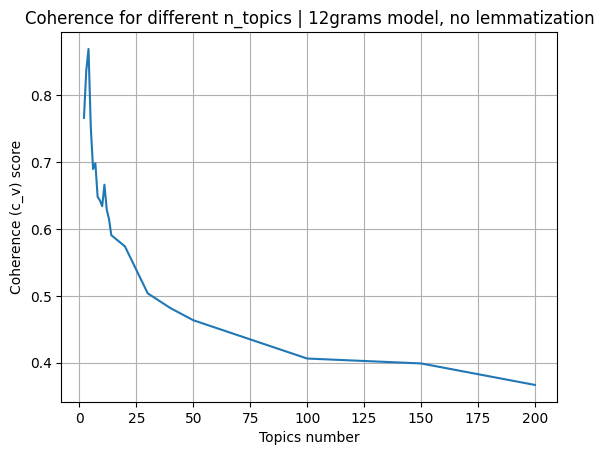

In [43]:
plt.plot(topic_numbers_12grams, coherences_12grams)
plt.title('Coherence for different n_topics | 12grams model, no lemmatization')
plt.xlabel('Topics number')
plt.ylabel('Coherence (c_v) score')
plt.grid()
plt.show()

# 1- and 2-grams for the selected PoS

Let's build a model that performs topic modelling only for the certain most important parts of speech (PoS), starting with the nouns, verbs, adjectives, and adverbs.

In [44]:
import en_core_web_sm

In [45]:
en_sm = en_core_web_sm.load()

In [48]:
print(all_documents_092022[0])
print([[tok.text, tok.pos_] for tok in en_sm(all_documents_092022[0])])

It's time to take the fight to Heckfire's invasive Hydra problem! Fierce as they may be, no hydra is a match for Polli, Reefus and Snippysnap! Learn more about these radical raiders at https://t.co/tCmvQWaISI

 #Dragons #Hydra #War #PVP #Win #Hardcore #NEW https://t.co/4FnWHSBVMP
[['It', 'PRON'], ["'s", 'AUX'], ['time', 'NOUN'], ['to', 'PART'], ['take', 'VERB'], ['the', 'DET'], ['fight', 'NOUN'], ['to', 'ADP'], ['Heckfire', 'PROPN'], ["'s", 'PART'], ['invasive', 'ADJ'], ['Hydra', 'PROPN'], ['problem', 'NOUN'], ['!', 'PUNCT'], ['Fierce', 'ADJ'], ['as', 'SCONJ'], ['they', 'PRON'], ['may', 'AUX'], ['be', 'AUX'], [',', 'PUNCT'], ['no', 'DET'], ['hydra', 'NOUN'], ['is', 'AUX'], ['a', 'DET'], ['match', 'NOUN'], ['for', 'ADP'], ['Polli', 'PROPN'], [',', 'PUNCT'], ['Reefus', 'PROPN'], ['and', 'CCONJ'], ['Snippysnap', 'PROPN'], ['!', 'PUNCT'], ['Learn', 'VERB'], ['more', 'ADJ'], ['about', 'ADP'], ['these', 'DET'], ['radical', 'ADJ'], ['raiders', 'NOUN'], ['at', 'ADP'], ['https://t.co/tCmvQWaISI

In [50]:
print([[tok.lemma_, tok.pos_] for tok in en_sm(all_documents_092022[0])])

[['it', 'PRON'], ['be', 'AUX'], ['time', 'NOUN'], ['to', 'PART'], ['take', 'VERB'], ['the', 'DET'], ['fight', 'NOUN'], ['to', 'ADP'], ['Heckfire', 'PROPN'], ["'s", 'PART'], ['invasive', 'ADJ'], ['Hydra', 'PROPN'], ['problem', 'NOUN'], ['!', 'PUNCT'], ['fierce', 'ADJ'], ['as', 'SCONJ'], ['they', 'PRON'], ['may', 'AUX'], ['be', 'AUX'], [',', 'PUNCT'], ['no', 'DET'], ['hydra', 'NOUN'], ['be', 'AUX'], ['a', 'DET'], ['match', 'NOUN'], ['for', 'ADP'], ['Polli', 'PROPN'], [',', 'PUNCT'], ['Reefus', 'PROPN'], ['and', 'CCONJ'], ['Snippysnap', 'PROPN'], ['!', 'PUNCT'], ['learn', 'VERB'], ['more', 'ADJ'], ['about', 'ADP'], ['these', 'DET'], ['radical', 'ADJ'], ['raider', 'NOUN'], ['at', 'ADP'], ['https://t.co/tCmvQWaISI', 'PROPN'], ['\n\n ', 'SPACE'], ['#', 'SYM'], ['dragon', 'NOUN'], ['#', 'SYM'], ['Hydra', 'PROPN'], ['#', 'SYM'], ['War', 'PROPN'], ['#', 'SYM'], ['PVP', 'PROPN'], ['#', 'NOUN'], ['win', 'VERB'], ['#', 'SYM'], ['Hardcore', 'PROPN'], ['#', 'SYM'], ['new', 'ADJ'], ['https://t.co/4fn

In [68]:
class EnglishPreprocessor:
    def preprocess_documents(self, documents_list: list,
                             filter_by_pos: list = [],
                             return_strings: bool = True,
                             verbose: int = 0):
        preprocessed_documents = []
        for i_d, doc in enumerate(documents_list):
            preprocessed_documents.append(self.preprocess(doc,
                                                          filter_by_pos=filter_by_pos,
                                                          return_string=return_strings))
            if (verbose == 1) and ((i_d == 0) or ((i_d + 1)%100 == 0)):
                print(f'--Preprocessed documents: {i_d+1}/{len(documents_list)}')
        return preprocessed_documents
    
    # Function to preprocess documents
    def preprocess(self, document, filter_by_pos: list = [], return_string: bool = True):
        # Tokenize
        document = self.remove_links_content(document)
        document = self.remove_emails(document)
        document = self.remove_multiple_space(document)
        document = self.remove_hashtags(document)
        document = self.remove_punctuation(document)
        document = self.remove_multiple_space(document)

        # Tokenize and lemmatize
        processed_document = en_sm(document.lower())
        if len(filter_by_pos) > 0:
            lemmatized_words = [word.lemma_ for word in processed_document if (
                word.pos_ in filter_by_pos)]
        else:
            lemmatized_words = [word.lemma_ for word in processed_document]
        # Remove stopwords and punctuations
        filtered_words = [word for word in lemmatized_words if word.isalnum() and not word in stop_words]
        if return_string:
            return ' '.join(filtered_words)
        else:
            return filtered_words
    
    def remove_links_content(self, text):
        text = re.sub(r"http\S+", "", text)
        return text
    
    def remove_emails(self, text):
        return re.sub('\S+@\S*\s?', '', text)
    
    def remove_punctuation(self, text):
        """https://stackoverflow.com/a/37221663"""
        table = str.maketrans({key: None for key in string.punctuation})
        return text.translate(table)
    
    def remove_multiple_space(self, text):
        return re.sub("\s\s+", " ", text)

    def remove_hashtags(self, text):
        old_text = text + '\n'
        new_text = text
        while len(new_text) < len(old_text):
            old_text = new_text
            new_text = re.sub('(?<=[\s\n])#\S+\s*$', '', new_text)
        return new_text

In [69]:
class LSAPipelineEnglish:
    def __init__(self, documents_list, tf_idf_max_df=1.0, tf_idf_min_df=1,
                 lsa_components: int = 100, svd_n_iter: int = 5,
                 n_top_words: int = 10, ngram_range: tuple = (1, 1),
                 filter_by_pos: list = [], import_preprocessed_documents: bool = False,
                 random_state: int = -1, verbose: int = 0):
        if not import_preprocessed_documents:
            self.import_documents_list = EnglishPreprocessor().preprocess_documents(documents_list,
                                                                                    filter_by_pos=filter_by_pos,
                                                                                    verbose=verbose)
        else:
            self.import_documents_list = documents_list
        self.tf_idf_max_df = tf_idf_max_df
        self.tf_idf_min_df = tf_idf_min_df
        self.lsa_components = lsa_components
        self.svd_n_iter = svd_n_iter
        self.n_top_words = n_top_words
        self.ngram_range = ngram_range
        self.random_state = random_state
        self.coherence_texts_calculated = False
        self.verbose = verbose

    def run_topics_detection(self):
        tfidf_documents = self.TF_IDF()
        if self.verbose == 1:
            print(f'--LSA topics detection: TF-IDF calculated')
        self.TruncatedSVD(tfidf_documents)
        if self.verbose == 1:
            print(f'--LSA topics detection: truncated SVD calculated')
        self.topics = self.find_topics()
        return self.topics

    def transform_documents(self, new_documents_list: list):
        return list(map(np.argmax, self.svd_model.transform(
            self.tfidf_vectorizer.transform(new_documents_list))))

    def import_ready_documents(self, documents_list, texts, dictionary, corpus):
        self.import_documents_list = documents_list
        self.texts = texts
        self.dictionary = dictionary
        self.corpus = corpus
        self.coherence_texts_calculated = True

    def TF_IDF(self):
        self.tfidf_vectorizer = TfidfVectorizer(max_df=self.tf_idf_max_df,
                                                min_df=self.tf_idf_min_df,
                                                ngram_range=self.ngram_range,
                                                stop_words='english')
        return self.tfidf_vectorizer.fit_transform(self.import_documents_list)
        # tfidf_feature_names = self.tfidf_vectorizer.get_feature_names_out()
    
    def TruncatedSVD(self, tfidf_documents):
        if self.random_state != -1:
            self.svd_model = TruncatedSVD(n_components=self.lsa_components,
                                 n_iter=self.svd_n_iter, random_state=self.random_state)
        else:
            self.svd_model = TruncatedSVD(n_components=self.lsa_components,
                                 n_iter=self.svd_n_iter)
        self.svd_model.fit_transform(tfidf_documents)

    def find_topics(self):
        # Extract the top words for each topic
        topics = []
        tfidf_feature_names = self.tfidf_vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(self.svd_model.components_):
            top_features_ind = topic.argsort()[:-self.n_top_words - 1:-1]
            top_features = [tfidf_feature_names[i] for i in top_features_ind]
            topics.append(top_features)
        return topics

    def calculate_coherence_score(self, recalculate_texts: bool = False, verbose: int = 0):
        if not self.coherence_texts_calculated or recalculate_texts:
            self.calculate_coherence_texts(verbose=verbose)
        # Calculate the coherence score using Gensim
        coherence_model = CoherenceModel(topics=self.topics,
                                         texts=self.texts,
                                         dictionary=self.dictionary,
                                         coherence='c_v')
        if verbose == 1:
            print(f'--Calculating the coherence score')
        self.coherence_score = coherence_model.get_coherence()
        return self.coherence_score

    def calculate_coherence_texts(self, verbose: int = 0):
        # Convert the list of top words into a list of lists of words
        tfidf_feature_names = set(self.tfidf_vectorizer.get_feature_names_out())
        if verbose == 1:
            print(f'--Starting forming the texts')
        self.texts = [[word for word in doc.lower().split() if (
            word in tfidf_feature_names)] for doc in self.import_documents_list]
        # Create a Gensim dictionary
        if verbose == 1:
            print(f'--Creating the Gensim dectionary')
        self.dictionary = Dictionary(self.texts)
        # Convert the dictionary and the corpus
        if verbose == 1:
            print(f'--Converting to the corpus')
        self.corpus = [dictionary.doc2bow(text) for text in self.texts]
        self.coherence_texts_calculated = True

In [71]:
LSAPipeline = LSAPipelineEnglish(all_documents_092022, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=5, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 filter_by_pos=['NOUN','PNOUN','VERB','ADJ','ADV'],
                                 random_state=47, verbose=1)
topics_v7 = LSAPipeline.run_topics_detection()

--Preprocessed documents: 1/159916
--Preprocessed documents: 100/159916
--Preprocessed documents: 200/159916
--Preprocessed documents: 300/159916
--Preprocessed documents: 400/159916
--Preprocessed documents: 500/159916
--Preprocessed documents: 600/159916
--Preprocessed documents: 700/159916
--Preprocessed documents: 800/159916
--Preprocessed documents: 900/159916
--Preprocessed documents: 1000/159916
--Preprocessed documents: 1100/159916
--Preprocessed documents: 1200/159916
--Preprocessed documents: 1300/159916
--Preprocessed documents: 1400/159916
--Preprocessed documents: 1500/159916
--Preprocessed documents: 1600/159916
--Preprocessed documents: 1700/159916
--Preprocessed documents: 1800/159916
--Preprocessed documents: 1900/159916
--Preprocessed documents: 2000/159916
--Preprocessed documents: 2100/159916
--Preprocessed documents: 2200/159916
--Preprocessed documents: 2300/159916
--Preprocessed documents: 2400/159916
--Preprocessed documents: 2500/159916
--Preprocessed documents

In [72]:
topics_v7

[['russian',
  'ukrainian',
  'war',
  'ukraine',
  'say',
  'force',
  'people',
  'support',
  'live',
  'world'],
 ['live',
  'celtic',
  'sevilla',
  'realmadrid',
  'stream',
  'link',
  'celtic realmadrid',
  'live link',
  'real',
  'celtic real'],
 ['peace possible',
  'zaporizhzhiabelongstoukraine state',
  'limit peace',
  'possible defeat',
  'state limit',
  'zaporizhzhiabelongstoukraine',
  'defeat ukrainian',
  'defeat',
  'limit',
  'peace'],
 ['standwithukraine',
  'play',
  'standwithukraine play',
  'video',
  'play video',
  'radio',
  'play radio',
  'thank',
  'love',
  'biden'],
 ['russian',
  'force',
  'ukrainian',
  'armed force',
  'armed',
  'kherson',
  'video',
  'region',
  'destroy',
  'standwithukraine play']]

In [73]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
preprocessed_documents = LSAPipeline.import_documents_list

In [77]:
with open('preprocessed_documents_092022_pos.json','w') as json_file:
    json.dump({'preprocessed_documents': preprocessed_documents}, json_file)

In [74]:
# Convert the list of ngrams into a list of lists of words
texts_v7 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents]

# Create a Gensim dictionary
dictionary_v7 = Dictionary(texts_v7)

# Convert the dictionary and the corpus
corpus_v7 = [dictionary_v7.doc2bow(text) for text in texts_v7]

In [78]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics_v7,
                                 texts=texts_v7,
                                 dictionary=dictionary_v7,
                                 corpus=corpus_v7,
                                 coherence='c_v',
                                 processes=4)
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)


KeyboardInterrupt



## 1- and 2-grams for the selected PoS: optimal topics number

Model that uses both 1- and 2-grams for the selected parts of speech (PoS) for the different topics numbers for the data for the first week of September 2022.

In [ ]:
def calculate_coherence_for_plots(topic_numbers: list, texts,
                                  dictionary, lsa_pipeline,
                                  preprocessed_documents_list,
                                  n_top_words,
                                  ngram_range = (1,1),
                                  filter_by_pos = [],
                                  tf_idf_max_df = 0.9,
                                  tf_idf_min_df = 4,
                                  coherence_type: str = 'c_v',
                                  processes: int = 1
                                  random_state = 0,
                                  save_name = False,
                                  verbose: int = 0):
    coherences = []
    predicted_topics_counts = []
    for topic_number in topic_numbers:
        LSAPipeline = lsa_pipeline(preprocessed_documents_list, tf_idf_max_df=tf_idf_max_df,
                                   tf_idf_min_df=tf_idf_min_df,
                                   lsa_components=topic_number, svd_n_iter=5,
                                   n_top_words=n_top_words, ngram_range=ngram_range,
                                   filter_by_pos=filter_by_pos,
                                   import_preprocessed_documents=True, random_state=random_state)
        topics = LSAPipeline.run_topics_detection()
        tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
        # Calculate the coherence score using Gensim
        coherence_model = CoherenceModel(topics=topics,
                                         texts=texts,
                                         dictionary=dictionary,
                                         coherence=coherence_type,
                                         processes=processes)
        coherence_score = coherence_model.get_coherence()
        predicted_topics = LSAPipeline.transform_documents(LSAPipeline.import_documents_list)
        predicted_topics_count = [predicted_topics.count(x) for x in np.sort(np.unique(predicted_topics))]
        if verbose == 1:
            print(f'--Topic number {topic_number} coherence score: {coherence_score}')
        coherences.append(coherence_score)
        predicted_topics_counts.append(predicted_topics_count)
    if save_name:
        with open('coherences_{save_name}.json','w') as json_file:
            json.dump({'coherences': coherences,
                       'predicted_topics': predicted_topics_counts}, json_file)
    return coherences, predicted_topics_counts

In [ ]:
def plot_coherences(topic_numbers, coherences,
                    plot_description: str = '',
                    lang_description: str = 'Ukrainian'):
    plt.plot(topic_numbers, coherences)
    plt.title(f'Coherence for different n_topics | {plot_description} | {lang_description}')
    plt.xlabel('Topics number')
    plt.ylabel('Coherence (c_v) score')
    plt.grid()
    plt.show()

In [ ]:
topic_numbers_12grams = list(range(2,15)) + [20,30,40,50,100,150,200]
coherences_12grams = []
predicted_topics_counts_12grams = []
for topic_number in topic_numbers_12grams:
    LSAPipeline = LSAPipelineEnglish(preprocessed_documents, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                 lsa_components=topic_number, svd_n_iter=5,
                                 n_top_words=10, ngram_range=(1,2),
                                 filter_by_pos=['NOUN','PNOUN','VERB','ADJ','ADV'],
                                 import_preprocessed_documents=True, random_state=47)
    topics_12grams = LSAPipeline.run_topics_detection()
    tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())
    # Calculate the coherence score using Gensim
    coherence_model = CoherenceModel(topics=topics_12grams,
                                     texts=texts_v7,
                                     dictionary=dictionary_v7,
                                     corpus=corpus_v7,
                                     coherence='c_v',
                                     processes=4)
    coherence_score = coherence_model.get_coherence()
    predicted_topics = LSAPipeline.transform_documents(LSAPipeline.import_documents_list)
    predicted_topics_count = [predicted_topics.count(x) for x in np.sort(np.unique(predicted_topics))]
    
    print(f'--Topic number {topic_number} coherence score: {coherence_score}')
    coherences_12grams.append(coherence_score)
    predicted_topics_counts_12grams.append(predicted_topics_count)

In [ ]:
with open('coherences_12grams_pos.json','w') as json_file:
    json.dump({'coherences': coherences_12grams,
               'predicted_topics': predicted_topics_counts_12grams}, json_file)

In [ ]:
plt.plot(topic_numbers_12grams, coherences_12grams)
plt.title('Coherence for different n_topics | 12grams model, only certain PoS')
plt.xlabel('Topics number')
plt.ylabel('Coherence (c_v) score')
plt.grid()
plt.show()